In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

C:\Users\tasee\AppData\Local\Temp\ipykernel_28460\1073964129.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def make_plot(x, y_test, y_train, title = 'Title', x_label = 'x', y_label = 'y'):
    plt.figure()
    plt.scatter(x, y_test)
    plt.scatter(x, y_train)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(['Testing','Training'])
    plt.show()

In [12]:
set_random_seed(53)

def create_model(number_of_features, layers, nodes, learning, mode = 'constant'):
    model = Sequential()
    model.add(Input(shape = (number_of_features,)))
    
    if mode == 'constant':
        for n in range(layers):
            model.add(Dense(nodes, activation = 'relu'))
            
    elif mode == 'reduce':
        for n in range(layers):
            model.add(Dense(nodes - n*(nodes-2)//(layers-1), activation = 'relu'))
            
    model.add(Dense(2, activation = 'sigmoid'))
    opt = Adam(learning_rate = learning)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

In [13]:
heart = pd.read_csv("heart_attack.csv")
pd.set_option('display.max_columns', None)
heart

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [14]:
heart.pop('Patient ID')
heart.pop('Continent')
heart.pop('Hemisphere')

heart[['Systolic', 'Diastolic']] = heart['Blood Pressure'].str.split('/', expand = True)
heart.pop('Blood Pressure')

label_cols = ['Country']
heart[label_cols] = heart[label_cols].apply(LabelEncoder().fit_transform)

one_hot_sex = pd.get_dummies(heart['Sex'])
one_hot_diet = pd.get_dummies(heart['Diet'])
heart = pd.concat([heart, one_hot_sex, one_hot_diet], axis = 1)
heart.pop('Sex')
heart.pop('Diet')

pd.set_option('display.max_columns', None)
heart

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Systolic,Diastolic,Female,Male,Average,Healthy,Unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0,0,158,88,False,True,True,False,False
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,3,0,165,93,False,True,False,False,True
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,6,0,174,99,True,False,False,True,False
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,3,0,163,100,False,True,True,False,False
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,16,0,91,88,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,235420,19.655895,67,7,7,16,0,94,76,False,True,False,True,False
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,217881,23.993866,617,4,9,3,0,157,102,True,False,False,True,False
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,36998,35.406146,527,4,4,2,1,161,75,False,True,True,False,False
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,209943,27.294020,114,2,8,2,0,119,67,False,True,False,False,True


<Axes: xlabel='Heart Attack Risk', ylabel='Count'>

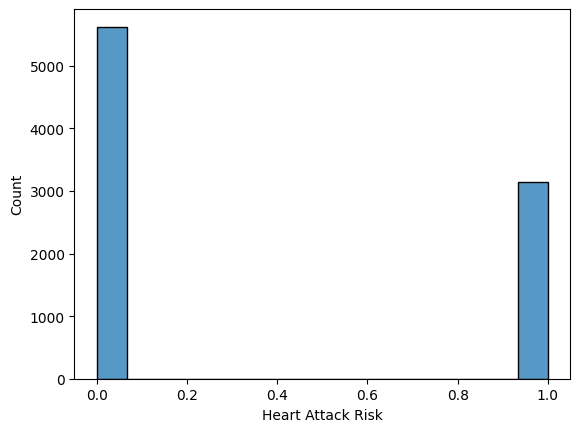

In [15]:
sns.histplot(data = heart['Heart Attack Risk'])

In [16]:
y = heart.pop('Heart Attack Risk')
X = heart

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 53, stratify = y)

y_train_hot = to_categorical(y_train)
y_train_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

<Axes: xlabel='Heart Attack Risk', ylabel='Count'>

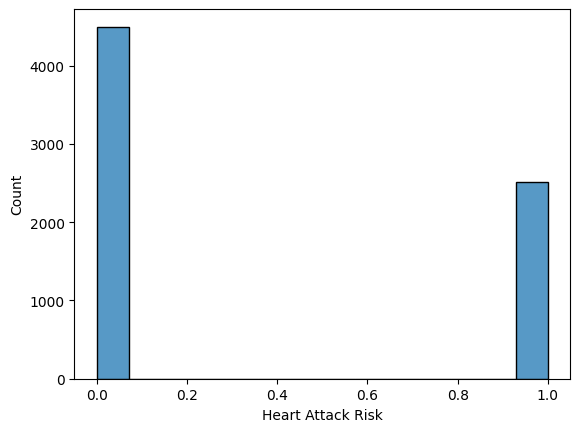

In [17]:
sns.histplot(data = y_train)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Done with layers: 10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with layers: 11
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with layers: 12
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Done with layers: 13
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with layers: 14
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with layers: 15
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with layers: 16
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with layers: 17
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Done with layers: 18
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with 

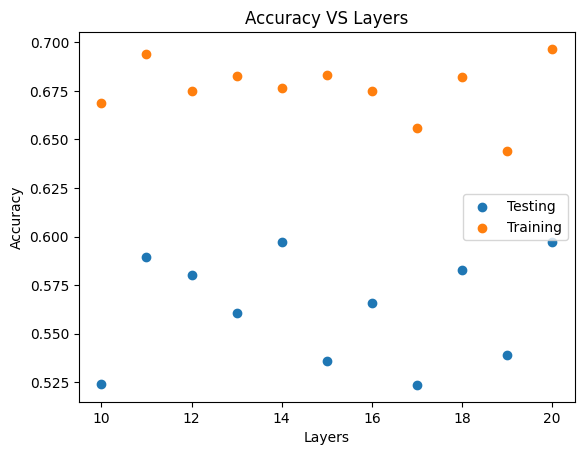

Best testing performance at 14 layers, 0.5972618368511123


In [20]:
#Keras layers (10-20) loop (constant node count)
test_scores = []
train_scores = []
n_values = []
for n in range(10,21):
    model = create_model(number_of_features=26, layers=n, nodes=10, learning=0.001)
    model.fit(X_train, y_train_hot, epochs=100, batch_size=32, verbose=0)
    
    #Test
    y_pred_test = model.predict(X_test)
    y_pred_test = np.argmax(y_pred_test, axis = 1)
    test_scores.append(accuracy_score(y_pred_test,y_test))
    
    #Train
    y_pred_train = model.predict(X_train)
    y_pred_train = np.argmax(y_pred_train, axis = 1)
    train_scores.append(accuracy_score(y_pred_train,y_train))
    
    n_values.append(n)
    print('Done with layers:', n)

make_plot(n_values, test_scores, train_scores, title='Accuracy VS Layers', x_label='Layers', y_label='Accuracy')

print('Best testing performance at', n_values[test_scores.index(max(test_scores))], 'layers,', max(test_scores))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Done with nodes: 4
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with nodes: 6
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Done with nodes: 8
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Done with nodes: 10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Done with nodes: 12
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Done with nodes: 14
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Done with nodes: 16
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Done with nodes: 18
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with nodes: 20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Done with nodes: 22


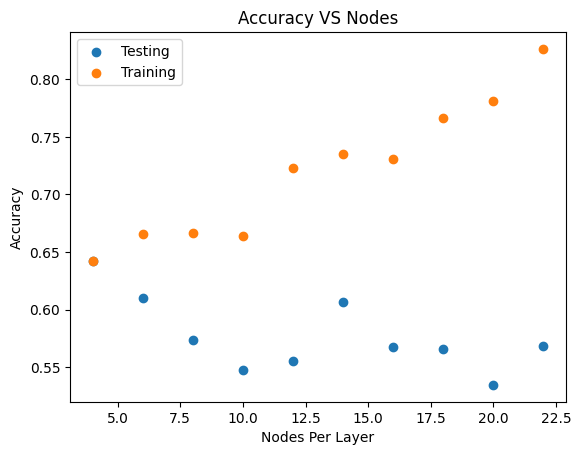

Best testing performance at 4 nodes per layer, 0.6417569880205363


In [21]:
test_scores = []
train_scores = []
n_values = []
for n in range(4,23,2):
    model = create_model(number_of_features=26, layers=6, nodes=n, learning=0.001)
    model.fit(X_train, y_train_hot, epochs=100, batch_size=32, verbose=0)
    
    #Test
    y_pred_test = model.predict(X_test)
    y_pred_test = np.argmax(y_pred_test, axis = 1)
    test_scores.append(accuracy_score(y_pred_test,y_test))
    
    #Train
    y_pred_train = model.predict(X_train)
    y_pred_train = np.argmax(y_pred_train, axis = 1)
    train_scores.append(accuracy_score(y_pred_train,y_train))
    
    n_values.append(n)
    print('Done with nodes:', n)

make_plot(n_values, test_scores, train_scores, title='Accuracy VS Nodes', x_label='Nodes Per Layer', y_label='Accuracy')

print('Best testing performance at', n_values[test_scores.index(max(test_scores))], 'nodes per layer,', max(test_scores))

In [ ]:
test_scores = []
train_scores = []
n_values = []
for n in range(16,53,4):
    model = create_model(number_of_features=26, layers=6, nodes=10, learning=0.001)
    model.fit(X_train, y_train_hot, epochs=100, batch_size=n, verbose=0)
    
    #Test
    y_pred_test = model.predict(X_test)
    y_pred_test = np.argmax(y_pred_test, axis = 1)
    test_scores.append(accuracy_score(y_pred_test,y_test))
    
    #Train
    y_pred_train = model.predict(X_train)
    y_pred_train = np.argmax(y_pred_train, axis = 1)
    train_scores.append(accuracy_score(y_pred_train,y_train))
    
    n_values.append(n)
    print('Done with batch size:', n)

make_plot(n_values, test_scores, train_scores, title='Accuracy VS Batch Size', x_label='Batch Size', y_label='Accuracy')

print('Best testing performance at batch size', n_values[test_scores.index(max(test_scores))], ':', max(test_scores))

In [ ]:
test_scores = []
train_scores = []
n_values = []
for n in range(1,11):
    model = create_model(number_of_features=26, layers=6, nodes=10, learning=0.001*n)
    model.fit(X_train, y_train_hot, epochs=100, batch_size=32, verbose=0)
    
    #Test
    y_pred_test = model.predict(X_test)
    y_pred_test = np.argmax(y_pred_test, axis = 1)
    test_scores.append(accuracy_score(y_pred_test,y_test))
    
    #Train
    y_pred_train = model.predict(X_train)
    y_pred_train = np.argmax(y_pred_train, axis = 1)
    train_scores.append(accuracy_score(y_pred_train,y_train))
    
    n_values.append(0.001*n)
    print('Done with learning rate:', 0.001*n)

make_plot(n_values, test_scores, train_scores, title='Accuracy VS Learning Rate', x_label='Learning Rate', y_label='Accuracy')

print('Best testing performance at learning rate', n_values[test_scores.index(max(test_scores))], ':', max(test_scores))